# Internet Traffic Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("website data.csv")
data.head()

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
data.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [6]:
data[data.duplicated()]

,Date,Daily Visitors


In [7]:
data.isnull().sum()

Date              0
Daily Visitors    0
dtype: int64

In [8]:
print(data['Daily Visitors'].describe())

count     173.000000
mean     2829.907514
std       765.194741
min      1245.000000
25%      2336.000000
50%      2751.000000
75%      3207.000000
max      7165.000000
Name: Daily Visitors, dtype: float64


In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data.set_index('Date', inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Daily Visitors  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [11]:
data.head()

,Daily Visitors
Date,
2021-10-01,2649
2021-10-02,2000
2021-10-03,2011
2021-10-04,3219
2021-10-05,3870


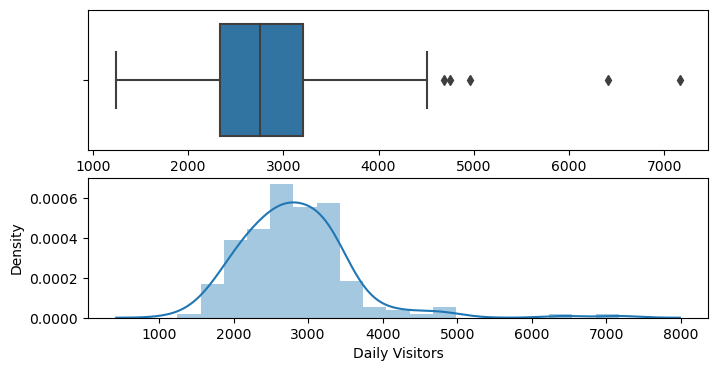

In [12]:
plt.figure(figsize = (8,4))
plt.subplot(211)
sns.boxplot(data['Daily Visitors'])
plt.subplot(212)
sns.distplot(data['Daily Visitors'])
plt.show()

In [13]:
data.loc[data['Daily Visitors']>=4500]

,Daily Visitors
Date,
2022-01-20,4509
2022-02-22,6407
2022-02-23,4751
2022-02-24,4961
2022-02-28,7165
2022-03-01,4687


In [14]:
q1 = np.percentile(data['Daily Visitors'], 25)

q3 = np.percentile(data['Daily Visitors'], 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [15]:
# Filter the data to remove outliers
df = data.copy()
df['visitors'] = df['Daily Visitors'].clip(lower=lower_bound, upper=upper_bound)
df = df.drop({"Daily Visitors"}, axis = 1)

In [16]:
df.shape

(173, 1)

Text(0.5, 1.0, 'Boxplot of Daily Visitors')

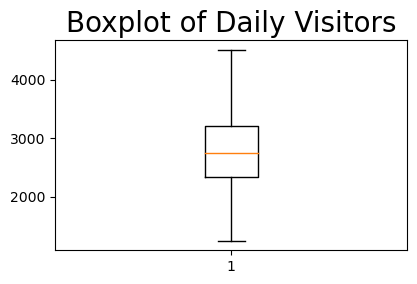

In [17]:
#create boxplot of Daily Visitors
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(x='visitors',data=df)
plt.title('Boxplot of Daily Visitors',fontsize=20)

In [18]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.day_name()

df

,visitors,year,month,day,day_of_week
Date,,,,,
2021-10-01,2649.0,2021,10,1,Friday
2021-10-02,2000.0,2021,10,2,Saturday
2021-10-03,2011.0,2021,10,3,Sunday
2021-10-04,3219.0,2021,10,4,Monday
2021-10-05,3870.0,2021,10,5,Tuesday
...,...,...,...,...,...
2022-03-18,2494.0,2022,3,18,Friday
2022-03-19,2976.0,2022,3,19,Saturday
2022-03-20,2534.0,2022,3,20,Sunday


In [19]:
df.head()

,visitors,year,month,day,day_of_week
Date,,,,,
2021-10-01,2649.0,2021,10,1,Friday
2021-10-02,2000.0,2021,10,2,Saturday
2021-10-03,2011.0,2021,10,3,Sunday
2021-10-04,3219.0,2021,10,4,Monday
2021-10-05,3870.0,2021,10,5,Tuesday


In [20]:
df['year'].value_counts()

2021    92
2022    81
Name: year, dtype: int64

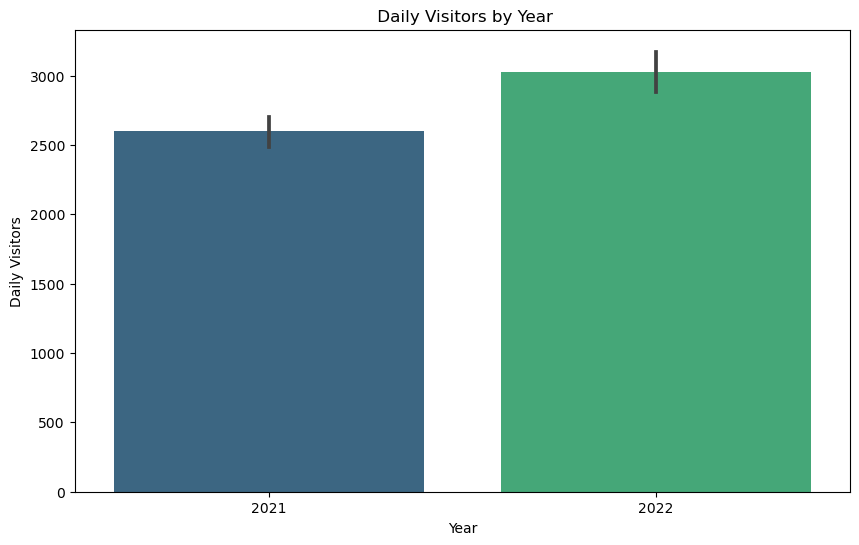

In [21]:
plt.figure(figsize=(10, 6))
plt.title(" Daily Visitors by Year")
sns.barplot(data=df, x='year', y='visitors', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Daily Visitors')

plt.show()

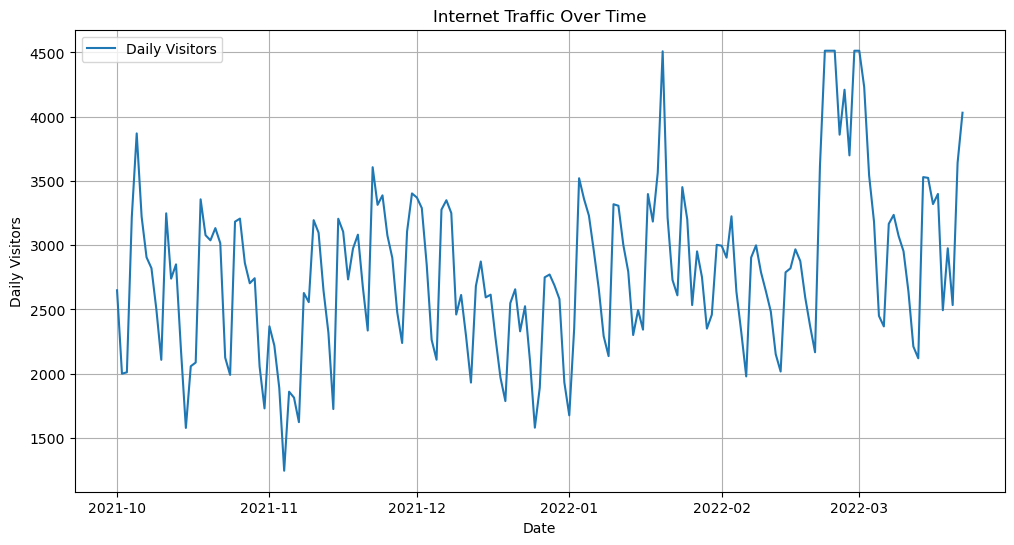

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['visitors'], label='Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Internet Traffic Over Time')
plt.legend()
plt.grid(True)
plt.show()


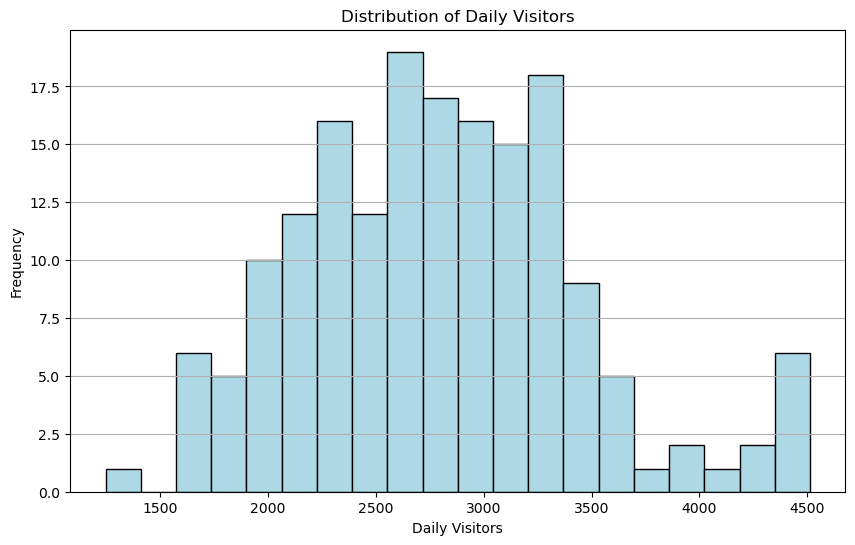

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['visitors'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Daily Visitors')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Visitors')
plt.grid(axis='y')
plt.show()

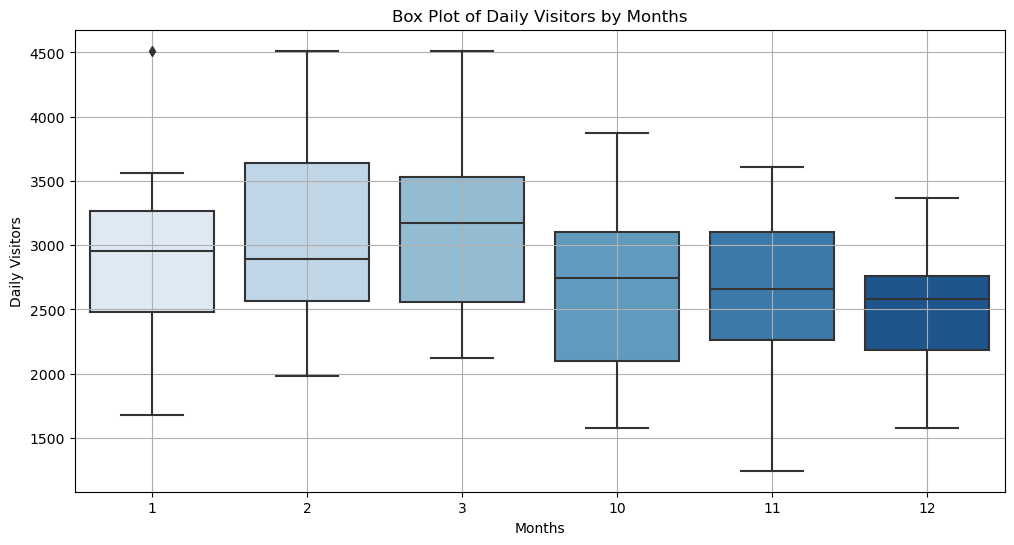

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='visitors', palette='Blues')
plt.xlabel('Months')
plt.ylabel('Daily Visitors')
plt.title('Box Plot of Daily Visitors by Months')
plt.grid(True)
plt.show()

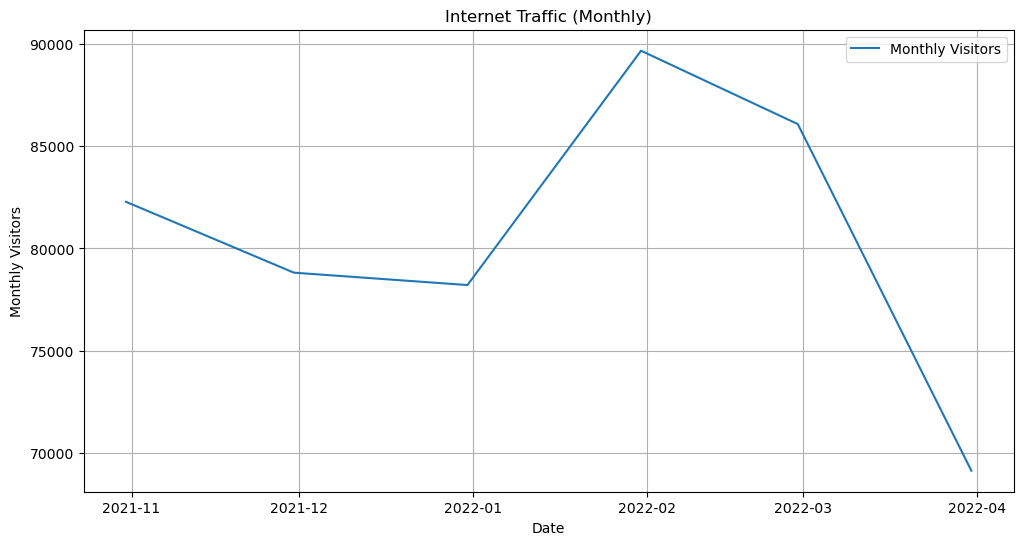

In [25]:
df.index = pd.to_datetime(df.index)

monthly_data = df.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['visitors'], label='Monthly Visitors')
plt.xlabel('Date')
plt.ylabel('Monthly Visitors')
plt.title('Internet Traffic (Monthly)')
plt.legend()
plt.grid(True)
plt.show()

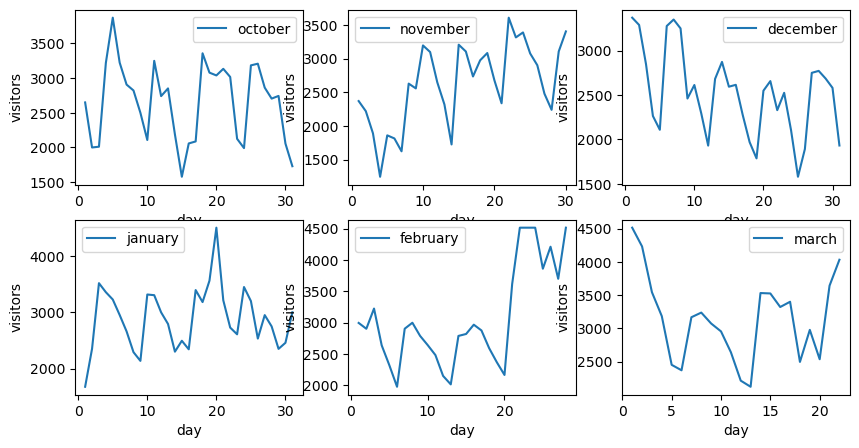

In [26]:
figure, axes = plt.subplots(2, 3, figsize=(10, 5))
sns.lineplot(ax=axes[0, 0], data = df.loc[df["month"]==10].sort_values(by='day'), x='day',y='visitors')
axes[0,0].legend(["october"])
sns.lineplot(ax=axes[0, 1], data = df.loc[df["month"]== 11].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[0, 2], data = df.loc[df["month"]==12].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 0], data = df.loc[df["month"]==1].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 1], data = df.loc[df["month"]==2].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 2], data = df.loc[df["month"]==3].sort_values(by='day'), x='day',y='visitors')
axes[0,1].legend(["november"])
axes[0,2].legend(["december"])
axes[1,0].legend(["january"])
axes[1,1].legend(["february"])
axes[1,2].legend(["march"])
plt.show()

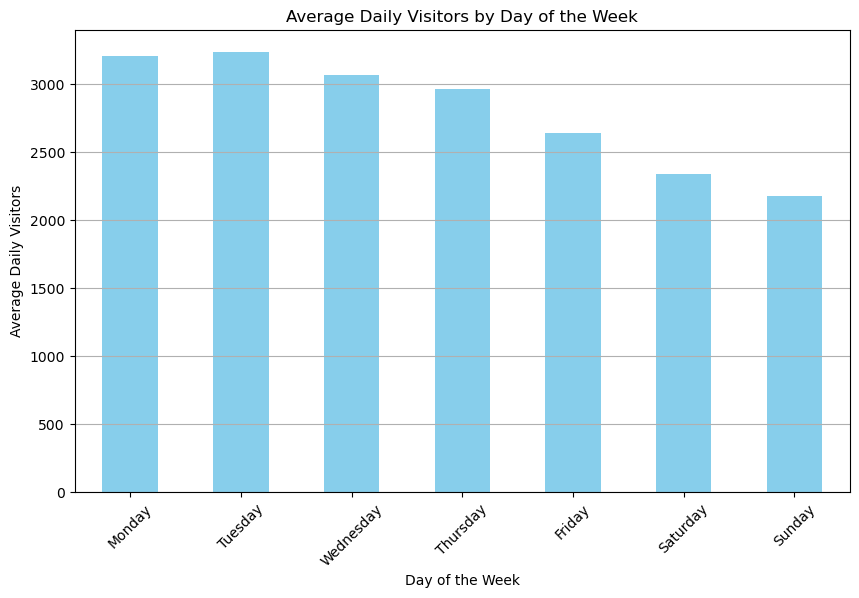

In [27]:
day_of_week_data = df.groupby('day_of_week')['visitors'].mean().reindex(['Monday',
                                                                               'Tuesday', 'Wednesday', 
                                                                               'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_of_week_data.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Visitors')
plt.title('Average Daily Visitors by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [28]:
df.shape

(173, 5)

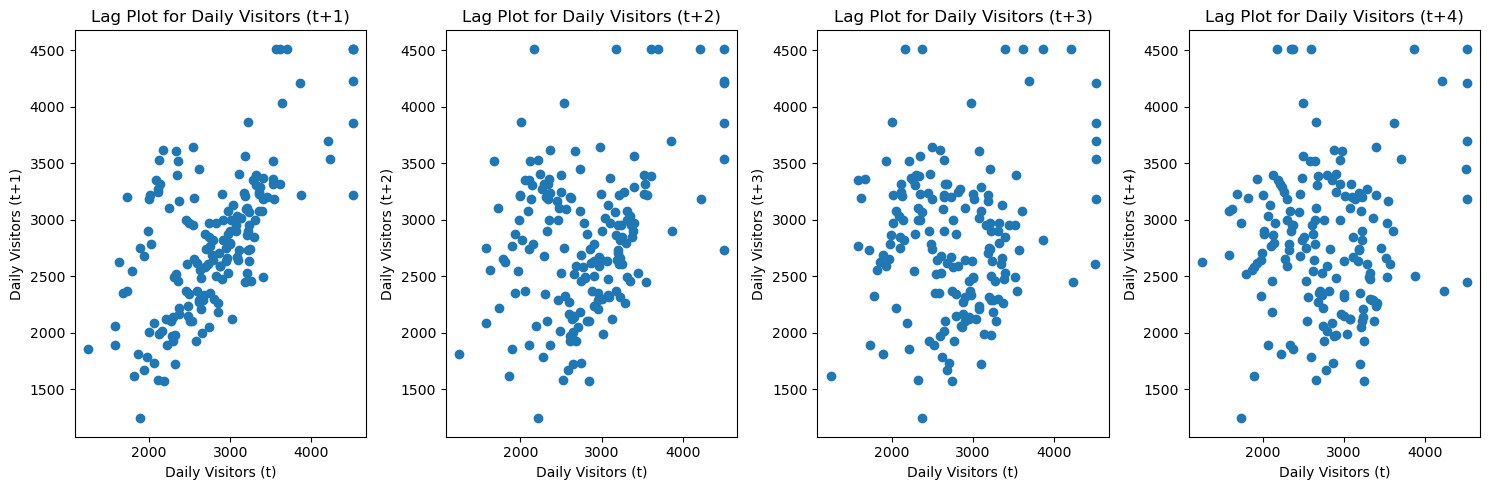

In [29]:
from pandas.plotting import lag_plot

daily_visitors = df['visitors']

lags = [1, 2, 3, 4]  


fig, axs = plt.subplots(1, len(lags), figsize=(15, 5))

for i, lag in enumerate(lags):
    lag_plot(daily_visitors, lag=lag, ax=axs[i])
    axs[i].set_title(f"Lag Plot for Daily Visitors (t+{lag})")
    axs[i].set_xlabel(f"Daily Visitors (t)")
    axs[i].set_ylabel(f"Daily Visitors (t+{lag})")

plt.tight_layout()
plt.show()


In [30]:
print(len(df['visitors']))


173


In [31]:
df = df.dropna()

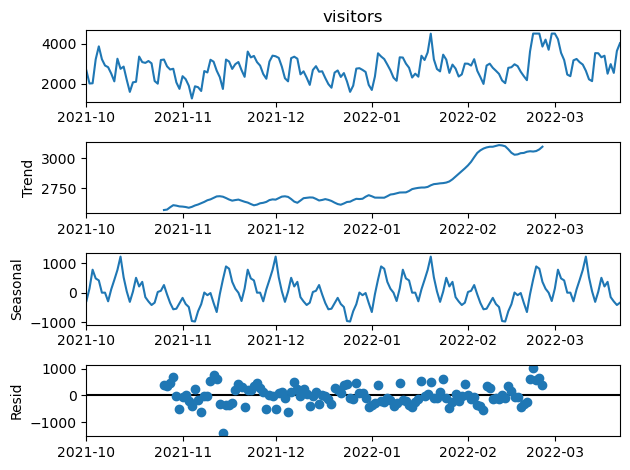

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['visitors'], model='additive',period = 50)
result.plot()
plt.show()

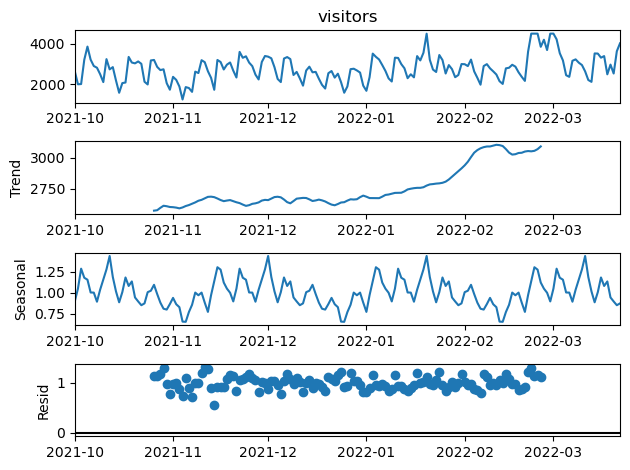

In [33]:
result = seasonal_decompose(df['visitors'], model='multiplicative',period = 50)
result.plot()
plt.show()

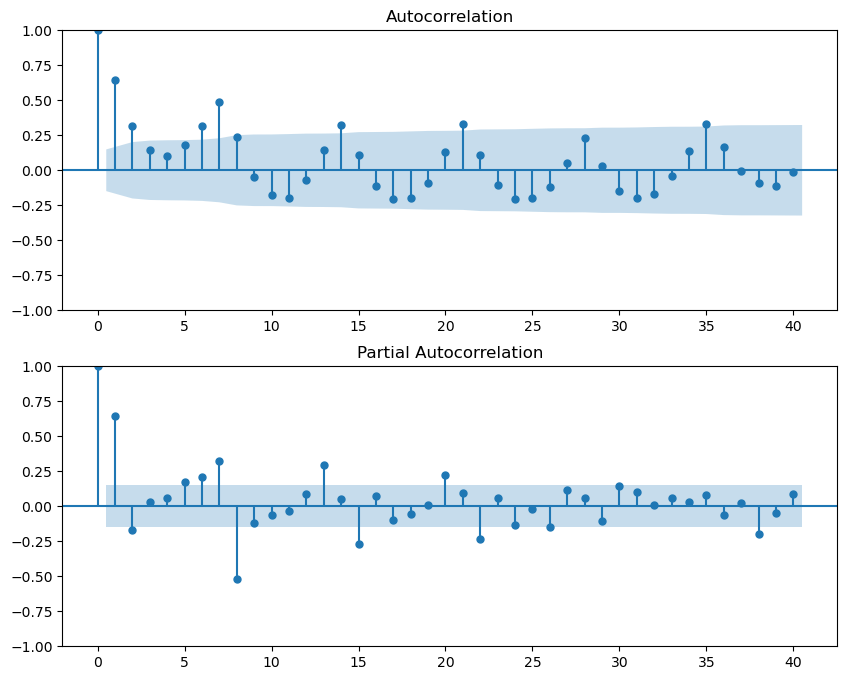

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['visitors'], lags=40, ax=ax1)
plot_pacf(df['visitors'], lags=40, ax=ax2)
plt.show()

### Augmented Dickey Fuller Test

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['visitors'], regression ='ct')
p_value = result[1]

print("KPSS Statistic:", result[0])
print("P-Value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

if p_value <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely non-stationary.")


KPSS Statistic: -3.6184785723270987
P-Value: 0.02831876672541504
Lags Used: 14
Critical Values: 158
Data is likely stationary.


### KPSS Test 

In the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test, the `regression` parameter specifies the type of trend to be included in the test. The `regression` parameter can take three different values: 'c' (constant), 'ct' (constant and trend), and 'ctt' (constant, linear trend, and quadratic trend). Each value corresponds to a different null hypothesis about the stationarity of the time series:

The choice of the `regression` parameter depends on the specific characteristics of your time series data and what you want to test for. 

- If you suspect that your time series has a constant trend, you can use `regression='c'` to test for stationarity around a constant.

- If you suspect that your time series has a constant trend and a linear trend, you can use `regression='ct'`.

- If you suspect that your time series has a constant trend, a linear trend, and a quadratic trend, you can use `regression='ctt'`.



Seasonal patterns are  addressed  in time series analysis using method seasonal decomposition and we found the seasonal trend in time series.
Here's why `regression='ct'` is a suitable choice for time series with seasonal patterns. 

In [36]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['visitors'], regression='ct')

print("KPSS Statistic:", result[0])
print("P-Value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

if result[1] < 0.05:
    print("The time series is not stationary (reject the null hypothesis)")
else:
    print("The time series is stationary (fail to reject the null hypothesis)")


KPSS Statistic: 0.08448853239059763
P-Value: 0.1
Lags Used: 6
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
The time series is stationary (fail to reject the null hypothesis)


- If the ADF test suggests stationarity (p-value <= 0.05) while the KPSS test suggests non-stationarity (p-value <= 0.05), this may indicate the presence of a trend (which ADF can detect) but not necessarily a deterministic trend (which KPSS can detect).

- If the ADF test suggests non-stationarity (p-value > 0.05) while the KPSS test suggests stationarity (p-value > 0.05), it could imply that there are cyclical or seasonal patterns in the data that are affecting the results.

### Transformations - Square root 

In [37]:
df['transform_visitors']=np.sqrt(df['visitors'])

In [38]:
result = adfuller(df['transform_visitors'], regression ='ct')
p_value = result[1]

print("KPSS Statistic:", result[0])
print("P-Value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

if p_value <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely non-stationary.")


KPSS Statistic: -3.6235051115209536
P-Value: 0.02791510323612543
Lags Used: 14
Critical Values: 158
Data is likely stationary.


## Model Building

### Spliting of data 

In [39]:
df.head()

,visitors,year,month,day,day_of_week,transform_visitors
Date,,,,,,
2021-10-01,2649.0,2021,10,1,Friday,51.468437
2021-10-02,2000.0,2021,10,2,Saturday,44.721360
2021-10-03,2011.0,2021,10,3,Sunday,44.844175
2021-10-04,3219.0,2021,10,4,Monday,56.736232
2021-10-05,3870.0,2021,10,5,Tuesday,62.209324


In [40]:
df.shape

(173, 6)

In [41]:
df = df.drop('day_of_week', axis=1)

In [42]:
df.shape

(173, 5)

In [43]:
# Split the data into training and testing sets
train_data = df.head(161)
test_data = df.tail(12)

In [44]:
train_data.shape, test_data.shape

((161, 5), (12, 5))

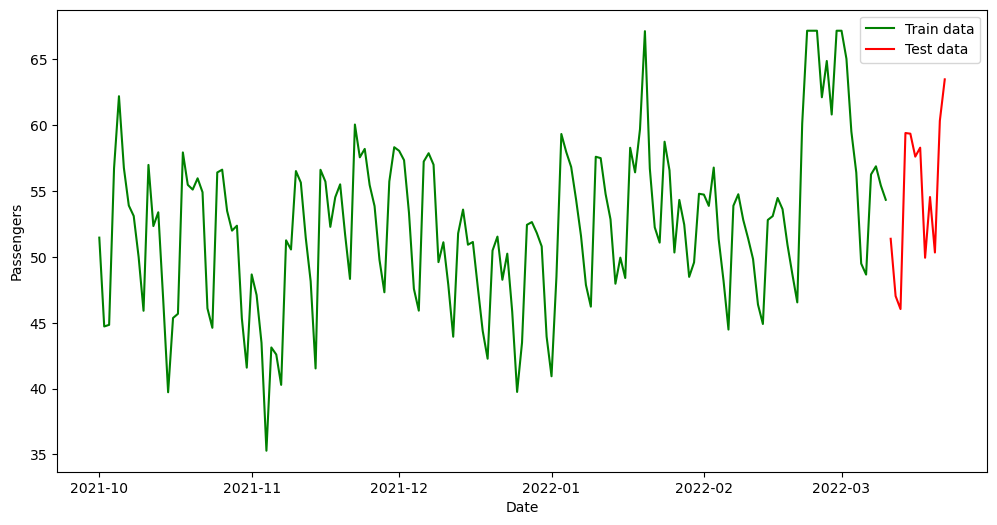

In [45]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(train_data['transform_visitors'], 'green', label='Train data')
plt.plot(test_data['transform_visitors'], 'red', label='Test data')
plt.legend()
plt.show()


Evaluation Metric MAPE

In [46]:

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Exponential Methods : 1:Simple Exponential Method using forecast attribute

In [58]:
from math import sqrt

In [60]:
alpha = 0.2  # Smoothing parameter (0 < alpha < 1)
ses_model = SimpleExpSmoothing(train_data['transform_visitors']).fit(smoothing_level=alpha)

test_pred_ses = ses_model.forecast(steps=len(test_data))

test_rmse_ses = sqrt(mean_squared_error(test_data['transform_visitors'], test_pred_ses))


mape_ses = MAPE(test_data['transform_visitors'], test_pred_ses)

train_pred_ses = ses_model.fittedvalues
train_rmse_ses = sqrt(mean_squared_error(train_data['transform_visitors'], train_pred_ses))

print('Simple Exponential Method Evaluation',"\n",
      'Mean Absolute Percent Error   = {:.2f}%'.format(mape_ses),"\n",
      'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_ses),"\n",
      'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_ses))



Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 9.43% 
 Train Root Mean Squared Error = 5.44 
 Test Root Mean Squared Error  = 5.64


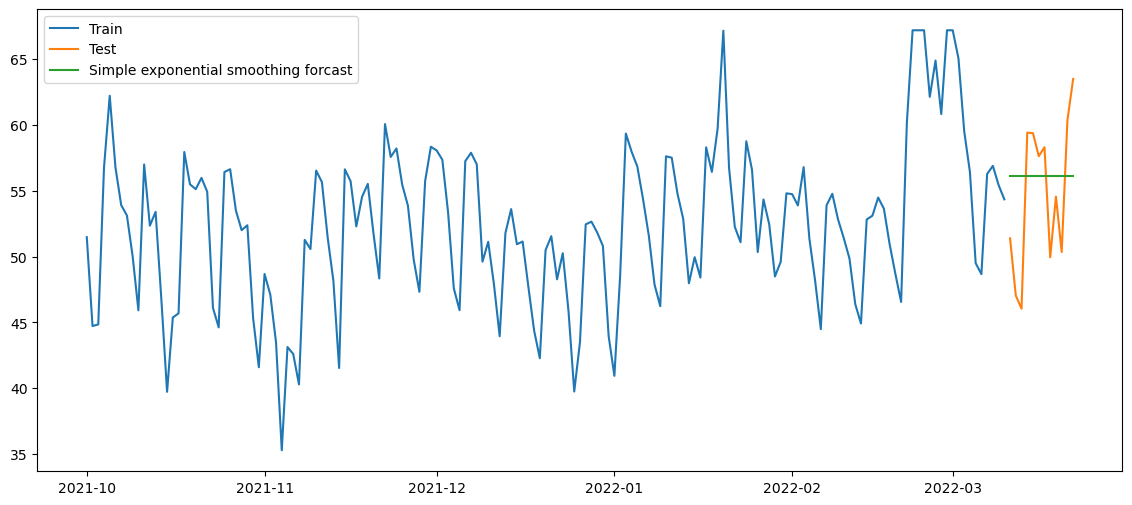

In [61]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### 2 : Holt method (Double Exponential)

In [62]:
dexp_model = Holt(train_data['transform_visitors'], exponential=True, damped=True).fit()
test_pred_dexp = dexp_model.forecast(steps=len(test_data))
test_rmse_dexp = sqrt(mean_squared_error(test_data['transform_visitors'], test_pred_dexp))
mape_dexp = MAPE(test_data['transform_visitors'], test_pred_dexp)

train_pred_dexp = dexp_model.fittedvalues
train_rmse_dexp = sqrt(mean_squared_error(train_data['transform_visitors'], train_pred_dexp))

print('Double Exponential Method Evaluation', "\n",
      'Mean Absolute Percent Error   = {:.2f}%'.format(mape_dexp), "\n",
      'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_dexp), "\n",
      'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_dexp))


Double Exponential Method Evaluation 
 Mean Absolute Percent Error   = 9.15% 
 Train Root Mean Squared Error = 5.09 
 Test Root Mean Squared Error  = 5.48


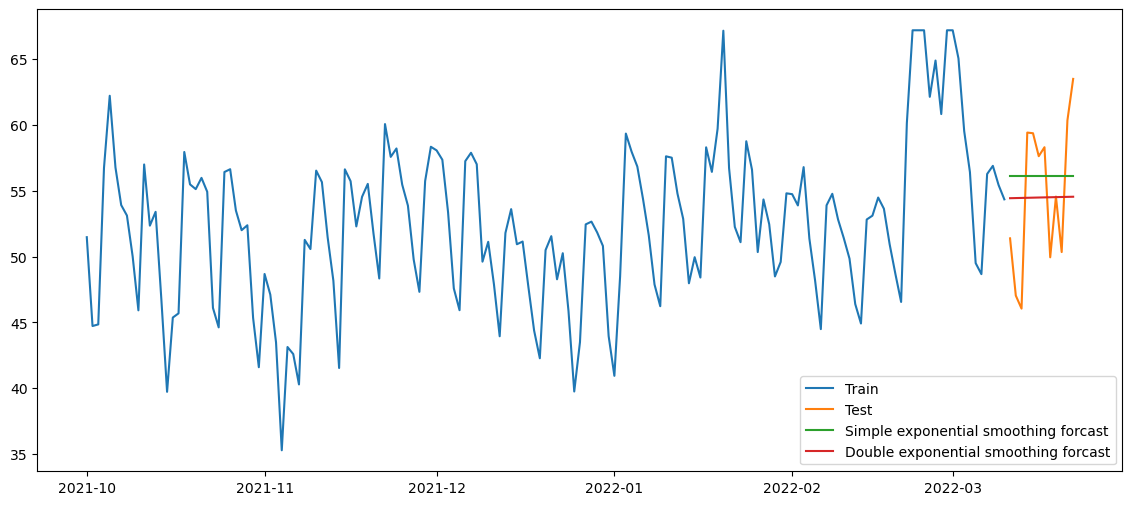

In [63]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### 3 : Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

In [64]:
texp_add_model = ExponentialSmoothing(train_data['transform_visitors'], seasonal="add", trend="add", seasonal_periods=12).fit(optimized=True)

test_pred_ad_texp = texp_add_model.forecast(steps=len(test_data))

test_rmse_ad_texp = sqrt(mean_squared_error(test_data['transform_visitors'], test_pred_ad_texp))
mape_ad_texp = MAPE(test_data['transform_visitors'], test_pred_ad_texp)

train_pred_ad_texp = texp_add_model.fittedvalues
train_rmse_ad_texp = sqrt(mean_squared_error(train_data['transform_visitors'], train_pred_ad_texp))

print('Triple Exponential with Additive Trend and Seasonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error   = {:.2f}%'.format(mape_ad_texp),"\n",\
      'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_ad_texp),"\n",\
      'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_ad_texp))


Triple Exponential with Additive Trend and Seasonality Method Evaluation 
 Mean Absolute Percent Error   = 10.40% 
 Train Root Mean Squared Error = 5.03 
 Test Root Mean Squared Error  = 6.15


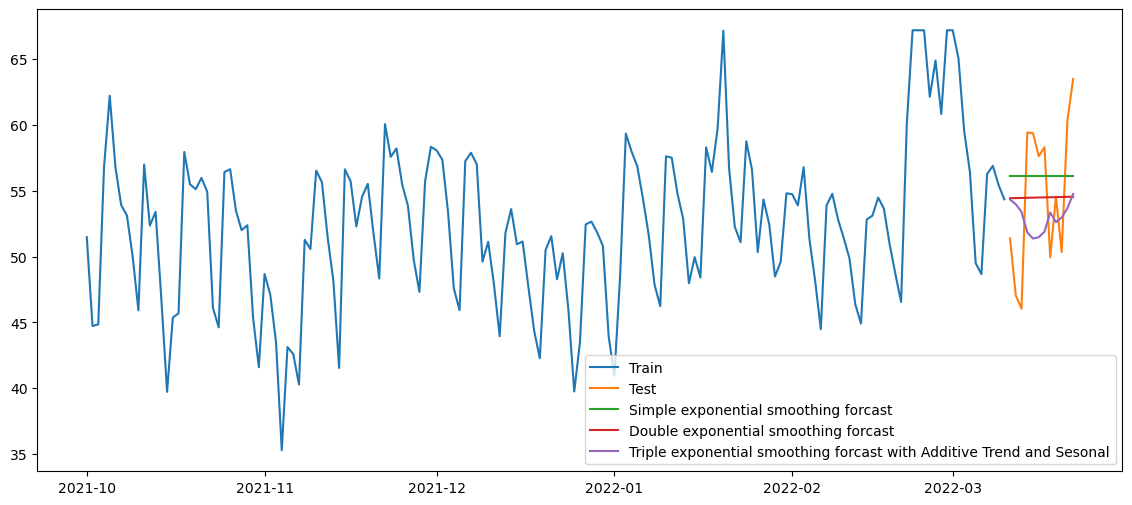

In [65]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

### 4: Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [66]:
texp_mul_ad_model  = ExponentialSmoothing(train_data['transform_visitors'],seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(steps=len(test_data))
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data['transform_visitors']))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data['transform_visitors'])

train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data['transform_visitors']))
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {:.2f}%'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 10.81% 
 Train Root Mean Squared Error = 5.03 
 Test Root Mean Squared Error  = 6.16


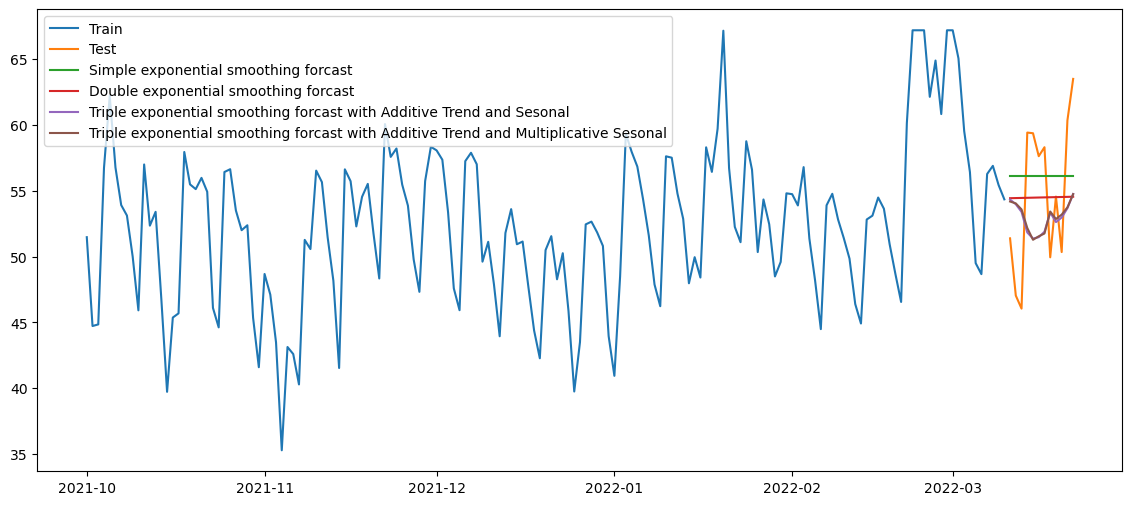

In [67]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

### 5: Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [69]:
texp_ad_mul_model = ExponentialSmoothing(train_data['transform_visitors'],seasonal="add",trend="mul",
                    seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(steps=len(test_data))
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data['transform_visitors']))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data['transform_visitors'])

train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data['transform_visitors']))
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {:.2f}%'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 54.58% 
 Train Root Mean Squared Error = 6.45 
 Test Root Mean Squared Error  = 20.62


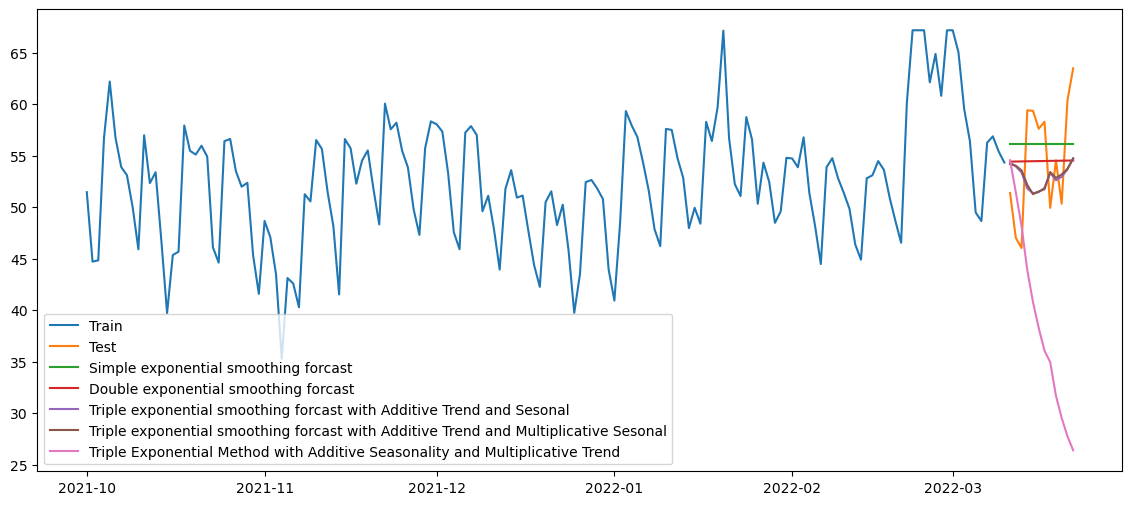

In [70]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

### 6: Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [71]:
texp_mul_model  = ExponentialSmoothing(train_data['transform_visitors'],seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(steps=len(test_data))
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data['transform_visitors']))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data['transform_visitors'])

train_pred_mul_texp  = texp_mul_model.fittedvalues

train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data['transform_visitors']))
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {:.2f}%'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 12.09% 
 Train Root Mean Squared Error = 5.03 
 Test Root Mean Squared Error  = 6.98


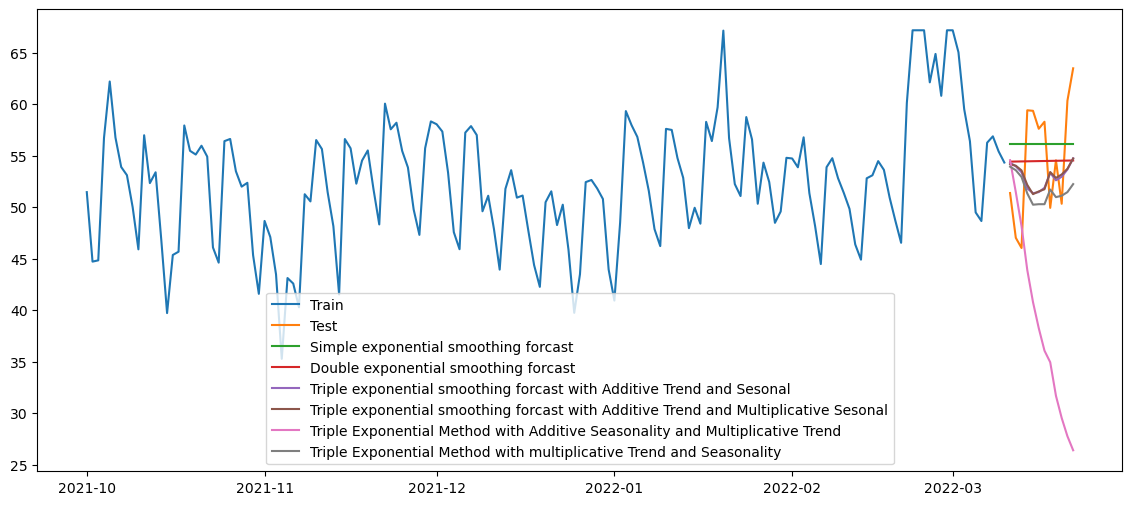

In [72]:
plt.figure(figsize=(14,6))
plt.plot(train_data['transform_visitors'], label='Train')
plt.plot(test_data['transform_visitors'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

## Comparing the results

In [73]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation = pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Double_Exp,5.094222,9.145395,5.475906
1,Simple_Exp,5.439431,9.428013,5.638096
2,Triple_Exp_Add,5.032010,10.398197,6.154400
3,Triple_Exp_Mul_Add,5.033724,10.808371,6.157330
4,Triple_Exp_Mul,5.029614,12.091285,6.981192
5,Triple_Exp_Add_Mul,6.448177,54.584079,20.623638


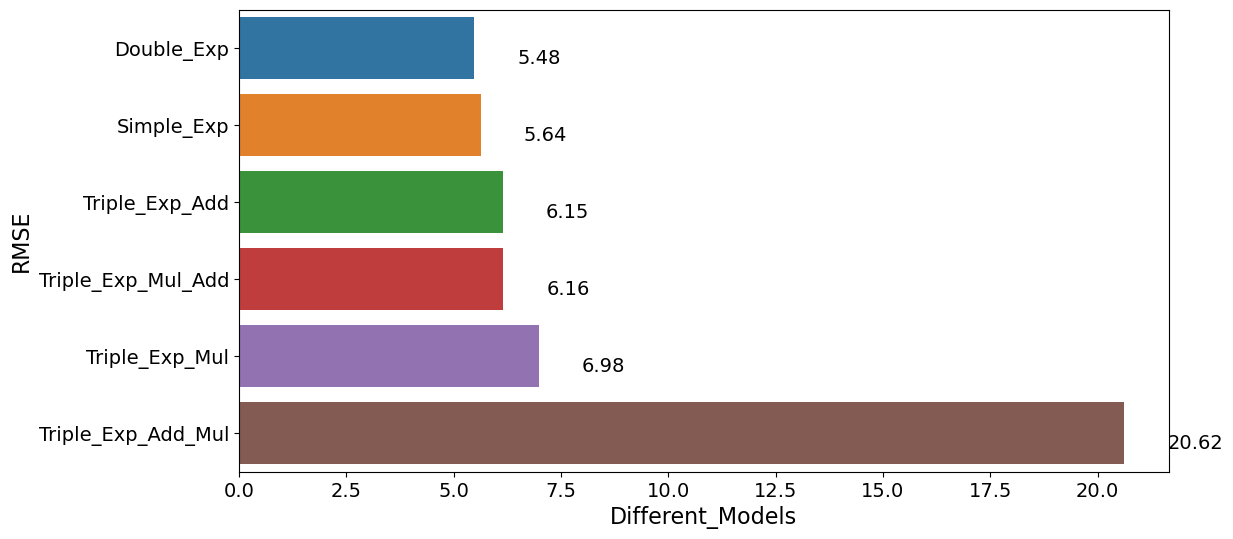

In [77]:
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x= 'Test_RMSE_Values', y= 'Models', data= table_evaluation, ax= axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,2)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 14)
plt.show()

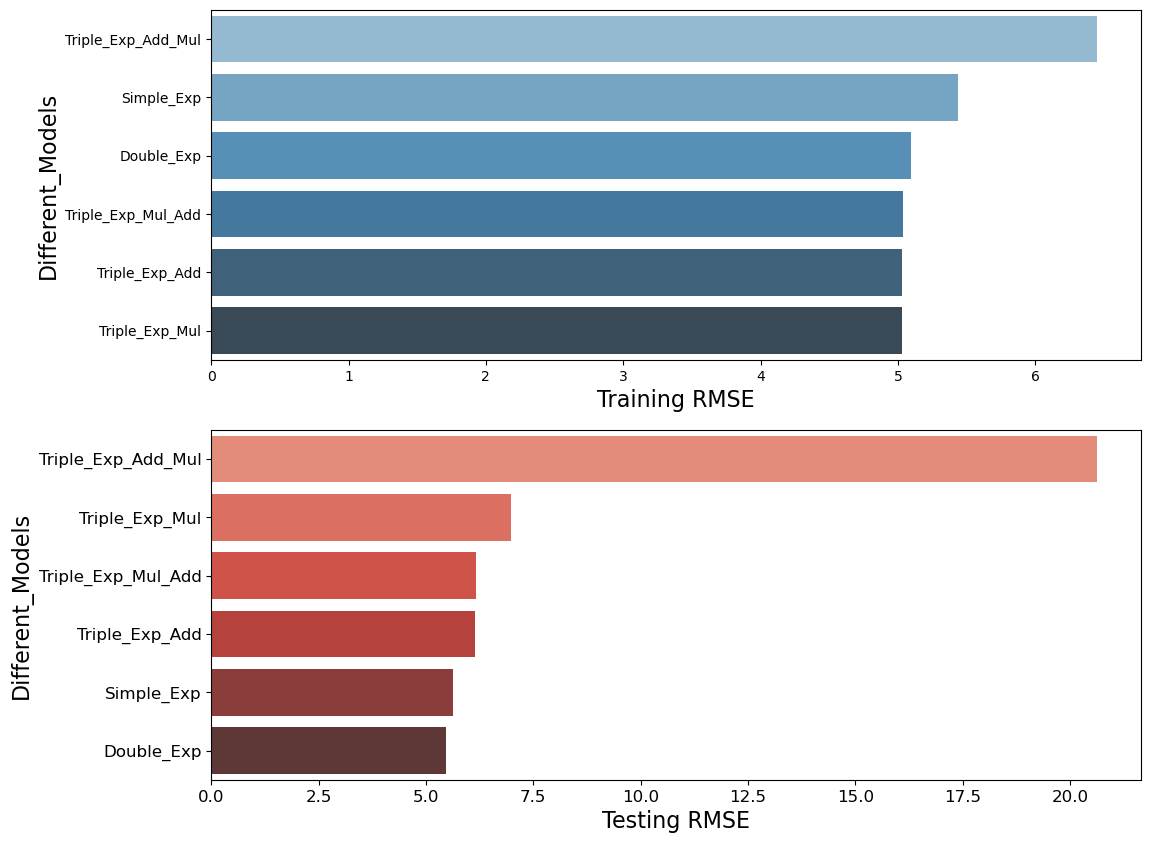

In [78]:
f, axes = plt.subplots(2,1, figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

## AR Model

In [79]:
from statsmodels.tsa.ar_model import AutoReg

lag_order = 20
ar_model = AutoReg(train_data['transform_visitors'], lags=lag_order).fit()

print(ar_model.summary())

start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
ar_test_predictions = ar_model.predict(start=start_idx, end=end_idx, dynamic=False)
ar_train_predictions = ar_model.predict(start=0, end=len(train_data) - 1, dynamic=False)
mape_ar_test = MAPE(ar_test_predictions,test_data['transform_visitors'])
test_rmse_ar = np.sqrt(np.abs((test_data['transform_visitors']-ar_test_predictions)**2)).mean()
train_rmse_ar = np.sqrt(np.abs((train_data['transform_visitors']-ar_train_predictions)**2)).mean()


                            AutoReg Model Results                             
Dep. Variable:     transform_visitors   No. Observations:                  161
Model:                    AutoReg(20)   Log Likelihood                -352.390
Method:               Conditional MLE   S.D. of innovations              2.946
Date:                Mon, 11 Sep 2023   AIC                            748.781
Time:                        15:23:58   BIC                            813.654
Sample:                    10-21-2021   HQIC                           775.143
                         - 03-10-2022                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.6732      5.773      1.849      0.064      -0.642      21.988
transform_visitors.L1      0.7868      0.082      9.561      0.000       0.626       0.948
tran

In [80]:
print(' AR Model',"\n",\
'Mean Absolute Percent Error   = {:.2f}%'.format(mape_ar_test ),"\n",\
'Train Root Mean Squared Error = {:.2f}'.format(train_rmse_ar ),"\n",
'Test Root Mean Squared Error  = {:.2f}'.format(test_rmse_ar ))

 AR Model 
 Mean Absolute Percent Error   = 8.83% 
 Train Root Mean Squared Error = 2.26 
 Test Root Mean Squared Error  = 4.51


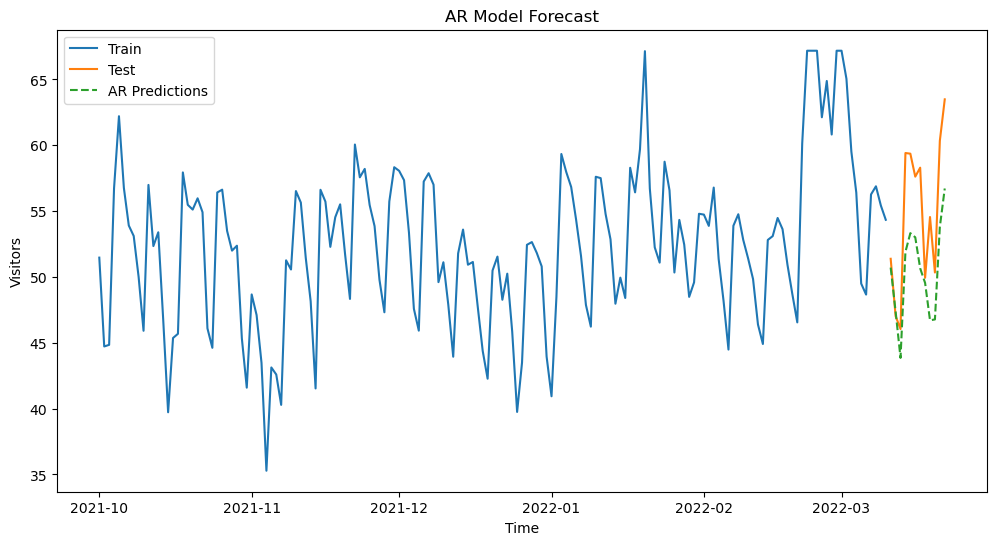

In [81]:

plt.figure(figsize=(12, 6))
plt.plot( train_data['transform_visitors'], label='Train')
plt.plot( test_data['transform_visitors'], label='Test')
plt.plot(ar_test_predictions, label='AR Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Visitors')
plt.title('AR Model Forecast')
plt.legend()
plt.show()

### ARIMA Model

In [82]:

p_values = range(1,21)  # Lags Values
d_values = [1,2] #  differencing
q_values = range(1,15)  # MA Components

best_arima_model = None
best_test_rmse = float('inf')
best_train_rmse = float('inf')
best_mape = float('inf')
best_order = (0, 0, 0)

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                arima_model = ARIMA(train_data['transform_visitors'], order=(p, d, q)).fit()

                arima_train_predictions = arima_model.predict(start=0, end=len(train_data) - 1, dynamic=False)
                arima_test_predictions = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

                test_rmse_arima = np.sqrt(np.mean((test_data['transform_visitors'] - arima_test_predictions)**2))
                train_rmse_arima = np.sqrt(np.mean((train_data['transform_visitors'] - arima_train_predictions)**2))

                mape_arima_test = MAPE(test_data['transform_visitors'], arima_test_predictions)
               
                if test_rmse_arima < best_test_rmse:
                    best_arima_model = arima_model
                    best_mape = mape_arima_test
                    best_test_rmse = test_rmse_arima
                    best_train_rmse = train_rmse_arima
                    best_order = (p, d, q)
                print(f"ARIMA({p},{d},{q}) - Train RMSE: {train_rmse_arima:.2f} - Test RMSE: {test_rmse_arima:.2f} - Test MAPE: {mape_arima_test:.2f}")
                        
            except:
                continue

print(f"Best ARIMA Model Order: {best_order}")
print(f"Best Test RMSE: {best_test_rmse:.2f}")
print(f"Best Train RMSE: {best_train_rmse:.2f}")
print(f"Best Test MAPE: {best_mape:.2f}")


ARIMA(1,1,1) - Train RMSE: 6.19 - Test RMSE: 5.46 - Test MAPE: 9.13
ARIMA(1,1,2) - Train RMSE: 6.13 - Test RMSE: 5.42 - Test MAPE: 9.12
ARIMA(1,1,3) - Train RMSE: 6.12 - Test RMSE: 5.44 - Test MAPE: 9.14
ARIMA(1,1,4) - Train RMSE: 6.03 - Test RMSE: 5.60 - Test MAPE: 9.40
ARIMA(1,1,5) - Train RMSE: 5.96 - Test RMSE: 6.10 - Test MAPE: 9.98
ARIMA(1,1,6) - Train RMSE: 5.92 - Test RMSE: 5.81 - Test MAPE: 9.78
ARIMA(1,1,7) - Train RMSE: 5.80 - Test RMSE: 5.22 - Test MAPE: 8.80
ARIMA(1,1,8) - Train RMSE: 5.75 - Test RMSE: 4.78 - Test MAPE: 7.82
ARIMA(1,1,9) - Train RMSE: 5.64 - Test RMSE: 5.00 - Test MAPE: 8.15
ARIMA(1,1,10) - Train RMSE: 5.64 - Test RMSE: 5.01 - Test MAPE: 8.18
ARIMA(1,1,11) - Train RMSE: 5.61 - Test RMSE: 5.28 - Test MAPE: 7.73
ARIMA(1,1,12) - Train RMSE: 5.59 - Test RMSE: 4.62 - Test MAPE: 7.25
ARIMA(1,1,13) - Train RMSE: 5.61 - Test RMSE: 4.55 - Test MAPE: 7.05
ARIMA(1,1,14) - Train RMSE: 5.52 - Test RMSE: 4.55 - Test MAPE: 6.69
ARIMA(1,2,1) - Train RMSE: 7.10 - Test RMSE

In [83]:
print(' ARIMA Model',"\n",\
'Mean Absolute Percent Error   = {:.2f}%'.format(best_mape),"\n",\
'Train Root Mean Squared Error = {:.2f}'.format(best_train_rmse),"\n",
'Test Root Mean Squared Error  = {:.2f}'.format(best_test_rmse))

 ARIMA Model 
 Mean Absolute Percent Error   = 2.83% 
 Train Root Mean Squared Error = 5.86 
 Test Root Mean Squared Error  = 2.09


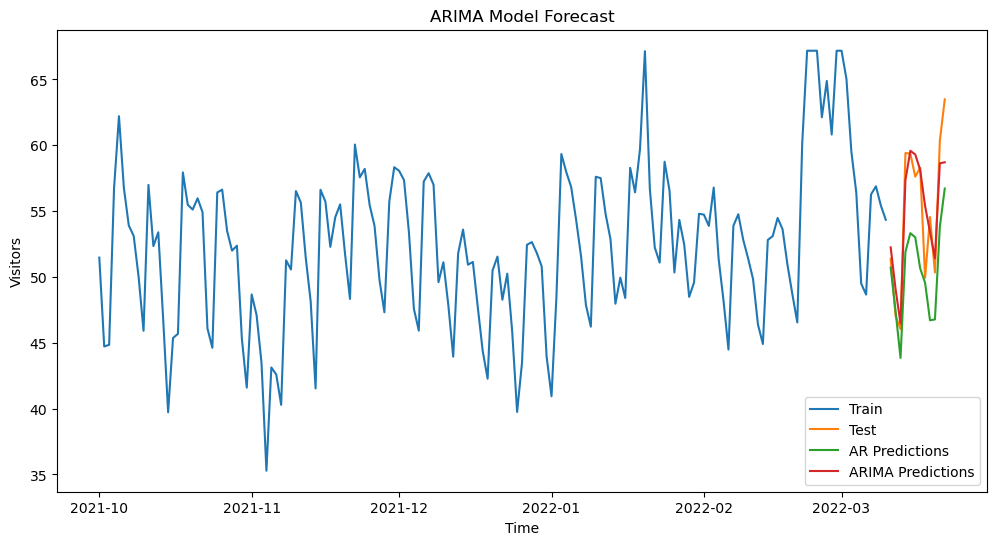

In [85]:

plt.figure(figsize=(12, 6))
plt.plot( train_data['transform_visitors'], label='Train')
plt.plot( test_data['transform_visitors'], label='Test')
plt.plot(ar_test_predictions, label='AR Predictions')
plt.plot(arima_test_predictions, label='ARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Visitors')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

### SARIMA Model

In [86]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings



p_values = [1,2]  # Non-seasonal AR order
d_values = [1] # Non-seasonal differencing
q_values = [1,2]  # Non-seasonal MA order
P_values = [8,14,15,16]  # Seasonal AR order
D_values = [0]  # Seasonal differencing (consider 1 as it's common)
Q_values = [8,14,15,16] # Seasonal MA order
s_values = [4]  # Seasonal period (7 for weekly data)




best_sarima_model = None
best_sarima_test_rmse = float('inf')
best_sarima_train_rmse = float('inf')
best_sarima_mape = float('inf')
best_sarima_order = (0, 0, 0, 0, 0, 0, 0)

for p, d, q, P, D, Q, s in product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
    try:
        sarima_model = SARIMAX(
            train_data['transform_visitors'],
            order=(p, d, q),
            seasonal_order=(P, D, Q, s),
            enforce_stationarity=False,
            enforce_invertibility=False,
        ).fit(disp=False)

        sarima_train_predictions = sarima_model.predict(
            start=0, end=len(train_data) - 1, dynamic=False
        )
        sarima_test_predictions = sarima_model.predict(
            start=len(train_data),
            end=len(train_data) + len(test_data) - 1,
            dynamic=False,
        )

        test_rmse_sarima = np.sqrt(
            np.mean(
                (test_data['transform_visitors'] - sarima_test_predictions) ** 2
            )
        )
        train_rmse_sarima = np.sqrt(
            np.mean(
                (train_data['transform_visitors'] - sarima_train_predictions) ** 2
            )
        )

        mape_sarima_test = MAPE(
            test_data['transform_visitors'], sarima_test_predictions
        )

        if test_rmse_sarima < best_sarima_test_rmse:
            best_sarima_model = sarima_model
            best_sarima_mape = mape_sarima_test
            best_sarima_test_rmse = test_rmse_sarima
            best_sarima_train_rmse = train_rmse_sarima
            best_sarima_order = (p, d, q, P, D, Q, s)

        print(
            f"SARIMA({p},{d},{q},{P},{D},{Q},{s}) - Train RMSE: {train_rmse_sarima:.2f} - Test RMSE: {test_rmse_sarima:.2f} - Test MAPE: {mape_sarima_test:.2f}"
        )

    except Exception as e:
        print(
            f"Failed SARIMA({p},{d},{q},{P},{D},{Q},{s}) - Error: {str(e)}"
        )
        continue

print(f"Best SARIMA Model Order: {best_sarima_order}")
print(f"Best Test RMSE: {best_sarima_test_rmse:.2f}")
print(f"Best Train RMSE: {best_sarima_train_rmse:.2f}")
print(f"Best Test MAPE: {best_sarima_mape:.2f}")


SARIMA(1,1,1,8,0,8,4) - Train RMSE: 6.42 - Test RMSE: 4.52 - Test MAPE: 6.60
SARIMA(1,1,1,8,0,14,4) - Train RMSE: 6.94 - Test RMSE: 5.04 - Test MAPE: 7.36
SARIMA(1,1,1,8,0,15,4) - Train RMSE: 6.82 - Test RMSE: 4.74 - Test MAPE: 6.75
SARIMA(1,1,1,8,0,16,4) - Train RMSE: 6.53 - Test RMSE: 4.23 - Test MAPE: 6.21
SARIMA(1,1,1,14,0,8,4) - Train RMSE: 6.79 - Test RMSE: 4.81 - Test MAPE: 7.00
SARIMA(1,1,1,14,0,14,4) - Train RMSE: 6.74 - Test RMSE: 3.84 - Test MAPE: 5.84
SARIMA(1,1,1,14,0,15,4) - Train RMSE: 7.79 - Test RMSE: 4.79 - Test MAPE: 6.73
SARIMA(1,1,1,14,0,16,4) - Train RMSE: 7.60 - Test RMSE: 4.73 - Test MAPE: 6.54
SARIMA(1,1,1,15,0,8,4) - Train RMSE: 7.04 - Test RMSE: 5.03 - Test MAPE: 7.73
SARIMA(1,1,1,15,0,14,4) - Train RMSE: 6.48 - Test RMSE: 8.03 - Test MAPE: 12.54
SARIMA(1,1,1,15,0,15,4) - Train RMSE: 6.23 - Test RMSE: 8.11 - Test MAPE: 12.67
SARIMA(1,1,1,15,0,16,4) - Train RMSE: 6.93 - Test RMSE: 5.27 - Test MAPE: 7.96
SARIMA(1,1,1,16,0,8,4) - Train RMSE: 7.04 - Test RMSE: 4.

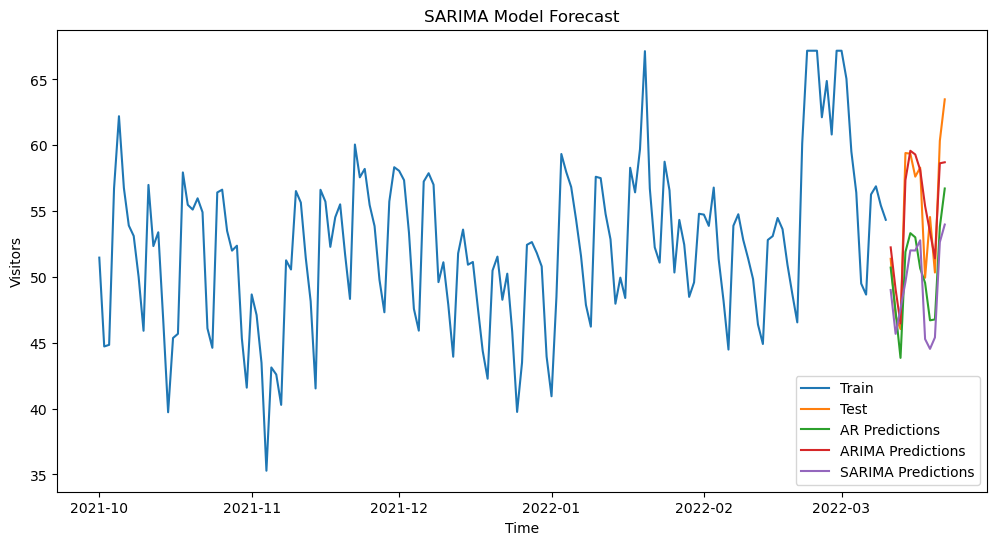

In [87]:

plt.figure(figsize=(12, 6))
plt.plot( train_data['transform_visitors'], label='Train')
plt.plot( test_data['transform_visitors'], label='Test')
plt.plot(ar_test_predictions, label='AR Predictions')
plt.plot(arima_test_predictions, label='ARIMA Predictions')
plt.plot(sarima_test_predictions, label='SARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Visitors')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

### LSTM

In [91]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [101]:

values = df['transform_visitors'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)


train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size]
test_data = scaled_values[train_size:]

window_size = 60

X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=30, batch_size=25)

inputs = scaled_values[len(scaled_values) - len(test_data) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model_lstm.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

rmse = np.sqrt(mean_squared_error(values[-len(test_data):], predicted_prices))



print(f"Root Mean Squared Error (RMSE): {rmse}")


Epoch 1/30
4/4 [==============================] - 5s 50ms/step - loss: 0.2020 - accuracy: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 0s 54ms/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 0s 54ms/step - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 4/30
4/4 [==============================] - 0s 56ms/step - loss: 0.0252 - accuracy: 0.0000e+00
Epoch 5/30
4/4 [==============================] - 0s 53ms/step - loss: 0.0270 - accuracy: 0.0000e+00
Epoch 6/30
4/4 [==============================] - 0s 54ms/step - loss: 0.0257 - accuracy: 0.0000e+00
Epoch 7/30
4/4 [==============================] - 0s 51ms/step - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 8/30
4/4 [==============================] - 0s 50ms/step - loss: 0.0243 - accuracy: 0.0000e+00
Epoch 9/30
4/4 [==============================] - 0s 53ms/step - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 10/30
4/4 [==============================] - 0s 53ms/step - loss: 0.0239 - accuracy: 

###  Compare the results

In [96]:
data = {"Models":pd.Series(["AR Model",
                            "ARIMA Model",
                            "SARIMA Model",
                            "LSTM",
                           "Simple exponential smoothing forcast",
                            "Double exponential smoothing forcast",
                            "Triple exponential smoothing forcast with Additive Trend and Sesonal",
                            "Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal",
                            "Triple Exponential Method with Additive Seasonality and Multiplicative Trend",
                            "Triple Exponential Method with multiplicative Trend and Seasonality"]),
        "RMSE_Values":pd.Series([test_rmse_ar,best_test_rmse,best_sarima_test_rmse,rmse,
                                test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,
                                 test_rmse_mul_texp])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [97]:
table_rmse

,Models,RMSE_Values
0,ARIMA Model,2.093461
1,SARIMA Model,3.361879
2,AR Model,4.509880
3,Double exponential smoothing forcast,5.475906
4,Simple exponential smoothing forcast,5.638096
5,Triple exponential smoothing forcast with Addi...,6.154400
6,Triple exponential smoothing forcast with Addi...,6.157330
7,Triple Exponential Method with multiplicative ...,6.981192
8,LSTM,7.839560
9,Triple Exponential Method with Additive Season...,20.623638


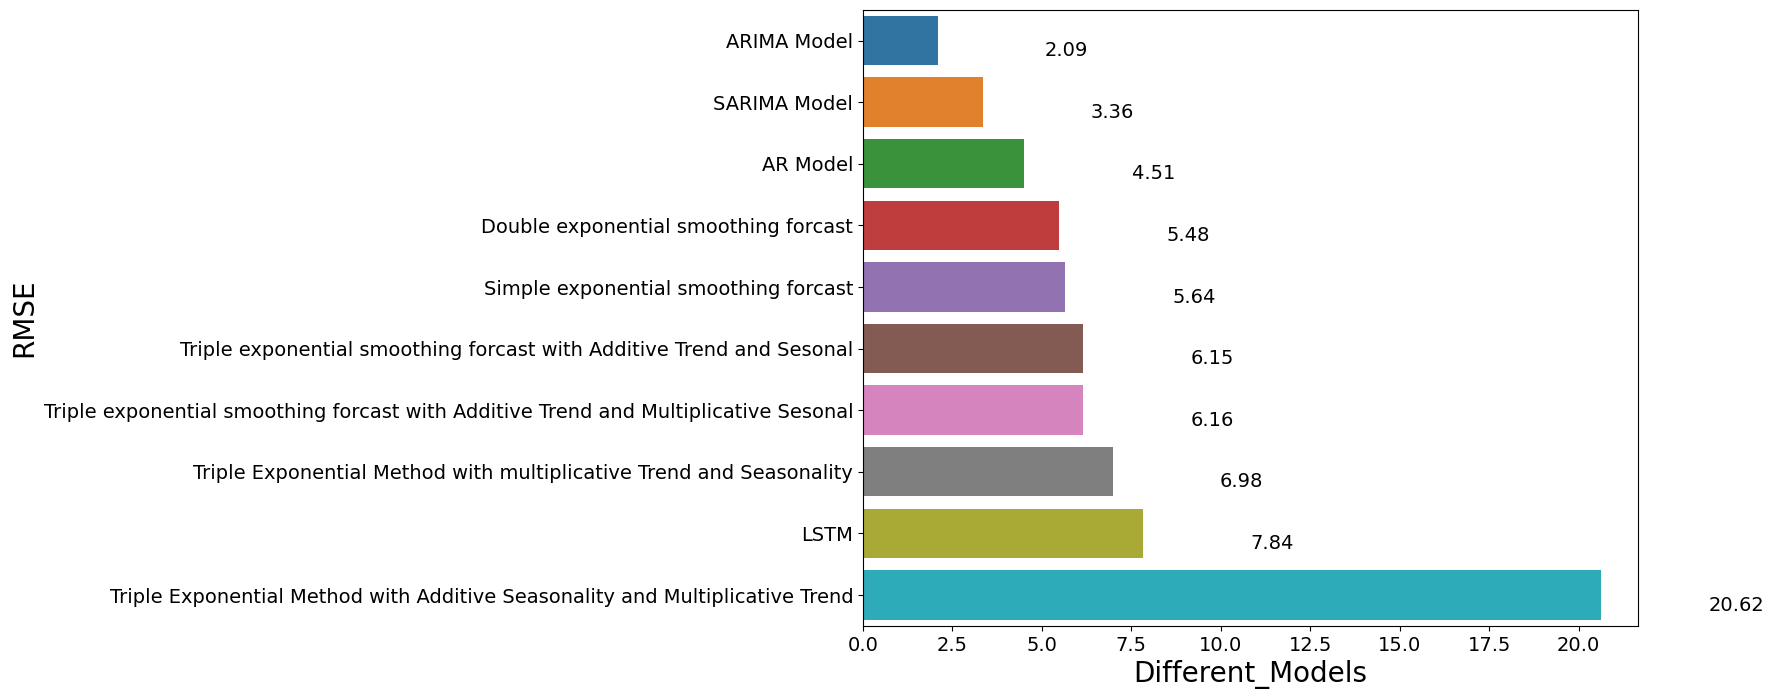

In [106]:
f, axe = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x='RMSE_Values', y='Models', data=table_rmse, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,2)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()

### Final Model : ARIMA

In [131]:
final_model = ARIMA(df['transform_visitors'], order=(20,2,6)).fit()

arima_predictions = final_model.predict(start=0, end=len(df) - 1, dynamic=False)

rmse_arima = np.sqrt(np.mean((df['transform_visitors'] - arima_predictions)**2))

                        

print(f"  RMSE: {rmse_arima:.2f}")


  RMSE: 5.71


In [149]:
import pickle

In [150]:
model_filename = 'Internet_Traffic_Trained_Model.sav'
pickle.dump(final_model, open(model_filename, 'wb'))

In [151]:
loaded_model = pickle.load(open('Internet_Traffic_Trained_Model.sav','rb'))


## Pipeline

In [147]:
class ARIMAModel:
    def __init__(self, model, data_index):
        self.model = model
        self.data_index = data_index

    def predict(self, input_date):
        if input_date in self.data_index:
            input_index = self.data_index.get_loc(input_date)
            
            print("Prediction")
                
            if input_index == 0:
                return self.model.forecast(steps=1).iloc[0] ** 2
            
           
            arima_predictions = self.model.predict(start=input_index, 
                                                  end=input_index, 
                                                  dynamic=False)
            
            return arima_predictions.iloc[0] ** 2  
            
        else:
            print("Future Forecast:")
            last_record_date = self.data_index[-1]
            steps_to_forecast = (input_date - last_record_date).days
            
            if steps_to_forecast < 0:
                steps_to_forecast = 1
                
            arima_forecast = self.model.forecast(steps=steps_to_forecast)
            return arima_forecast.iloc[0] ** 2  



In [148]:
data = df['transform_visitors']
data_index = data.index
input_date = pd.to_datetime('2021-10-01')

arima_new_predictions = ARIMAModel(final_model,data_index).predict(input_date)

print(arima_new_predictions)


Prediction
3777.036063680957


In [154]:
import pandas as pd

df.to_csv('data.csv', index=True)
